# Neural Network: Classification Problem



We will use neural networks to predict the species of iris flowers from data with the following features:

    sepal_length - Continuous variable measured in centimeters.
    sepal_width - Continuous variable measured in centimeters.
    petal_length - Continuous variable measured in centimeters.
    petal_width - Continuous variable measured in centimeters.
    species - Categorical. 2 species of iris flowers, Iris-virginica or Iris-versicolor.


    sepal_length  sepal_width  petal_length  petal_width          species
8            6.6          2.9           4.6          1.3  Iris-versicolor
39           5.5          2.5           4.0          1.3  Iris-versicolor
7            4.9          2.4           3.3          1.0  Iris-versicolor
72           7.7          2.8           6.7          2.0   Iris-virginica
86           6.3          3.4           5.6          2.4   Iris-virginica
['Iris-versicolor' 'Iris-virginica']


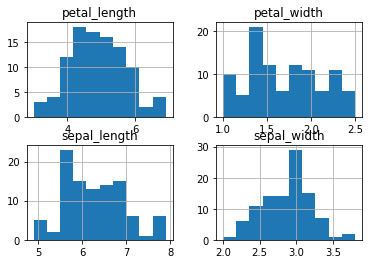

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
iris = pandas.read_csv("data/iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())

iris.hist()
plt.show()

In [2]:
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)
X_train = X[0:70]
y_train = y[0:70]
X_test = X[70:]
y_test= y[70:]

## Preprocessing Data

### Rescale Data

You can rescale your data using scikit-learn using the MinMaxScaler class.

Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms like:
* **gradient descent** 
* algorithms that weight inputs like **regression** and **neural networks** 
* algorithms that use distance measures like **K-Nearest Neighbors**.

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)



In [4]:
print(X_train1[:3])
print(X_test1[:3])


[[ 0.          0.56666667  0.5         0.41025641  0.2       ]
 [ 0.          0.2         0.27777778  0.25641026  0.2       ]
 [ 0.          0.          0.22222222  0.07692308  0.        ]]
[[ 0.          0.47826087  0.          0.57692308  0.33333333]
 [ 0.          0.60869565  0.21428571  0.57692308  0.6       ]
 [ 0.          1.          1.          1.          1.        ]]


### Data Standardisation

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test1)


print(X_train2[:3])
print(X_test2[:3])

[[ 0.          0.5125002   0.08457092 -0.37251647 -0.88964745]
 [ 0.         -1.15539985 -1.12358508 -1.10294091 -0.88964745]
 [ 0.         -2.06516352 -1.42562408 -1.95510276 -1.59947255]]
[[-1.         -8.76972618 -8.6745601  -5.270106   -3.17686165]
 [-1.         -8.57195147 -8.02733367 -5.270106   -2.54590601]
 [-1.         -7.97862734 -5.6541701  -4.75506313 -1.59947255]]


# Data Normalisation

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as **neural networks** and algorithms that use distance measures such as **K-Nearest Neighbors**.

In [6]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
X_train3 = scaler.transform(X_train)
X_test3 = scaler.transform(X_test)

print(X_train3[:3])
print(X_test3[:3])

[[ 0.11484395  0.75797005  0.33304745  0.52828216  0.14929713]
 [ 0.13460767  0.74034218  0.33651917  0.53843068  0.17498997]
 [ 0.15310507  0.75021485  0.36745217  0.50524673  0.15310507]]
[[ 0.12030742  0.7218445   0.26467632  0.60153709  0.18046113]
 [ 0.11504898  0.72480856  0.28762245  0.57524489  0.21859306]
 [ 0.0956686   0.68881389  0.34440695  0.58357844  0.23917149]]


# Binarize Data

It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

In [7]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5).fit(X_train)

X_train4 = binarizer.transform(X_train)
X_test4 = binarizer.transform(X_test)

print(X_train4[:3])
print(X_test4[:3])

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


# Multi-Layer Perceptron Classifier model

Let's apply this model to our rescale data. The model is fit on train data then prediction is made from the test data set and repot is made comparing the real output to the predicted ones.

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=4, max_iter = 2000)

In [9]:
mlp.fit(X_train1,y_train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
predictions = mlp.predict(X_test1)
print(predictions)
print(y_test)

[0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0]
[0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1]


# how good is our model?

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[15  0]
 [ 1 14]]


In [12]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        15
          1       1.00      0.93      0.97        15

avg / total       0.97      0.97      0.97        30



True positive (TP) and true negatives (TN) are the observations that are correctly predicted 

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no.


Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 

Accuracy = (TP+TN)/(TP+FP+FN+TN)

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

## Understanding Algorithm

### Implementing the activation function

In [17]:
# Initialize thetas randomly .
theta_init = np.random.normal(0,0.01,size=(5,1))
def sigmoid_activation(X, theta):
    return 1 / (1 + np.exp(-np.dot(X, theta)))
                
h1 = sigmoid_activation(X_train, theta_init)


(70, 1)

In [ ]:
def nnCostFunction(nn_params, 
                   input_layer_size, 
                   hidden_layer_size, 
                   num_labels, 
                   X, y, lambda)
# Implements the neural network cost function for a two layer
# neural network which performs classification
#   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
#   X, y, lambda) computes the cost and gradient of the neural network. The
#  parameters for the neural network are "unrolled" into the vector
#   nn_params and need to be converted back into the weight matrices. 
#
#   The returned parameter grad should be a "unrolled" vector of the
#   partial derivatives of the neural network.
#

# Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
# for our 2 layer neural network
Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape((hidden_layer_size, (input_layer_size + 1))
# Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
#                hidden_layer_size, (input_layer_size + 1));
Theta2 = nn_params[1 + (hidden_layer_size * (input_layer_size + 1)):].reshape((num_labels, (hidden_layer_size + 1))

# Setup some useful variables
m = size(X, 1);
         
# You need to return the following variables correctly 
J = 0;
Theta1_grad = zeros(Theta1.shape);
Theta2_grad = zeros(Theta2.shape);
                                                                              
# ====================== YOUR CODE HERE ======================
# Instructions: You should complete the code by working through the
#              following parts.
#
# Part 1: Feedforward the neural network and return the cost in the
#         variable J. After implementing Part 1, you can verify that your
#         cost function computation is correct by verifying the cost
#         computed in ex4.m
#
# Part 2: Implement the backpropagation algorithm to compute the gradients
#         Theta1_grad and Theta2_grad. You should return the partial derivatives of
#         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
#         Theta2_grad, respectively. After implementing Part 2, you can check
#         that your implementation is correct by running checkNNGradients
#
#         Note: The vector y passed into the function is a vector of labels
#               containing values from 1..K. You need to map this vector into a 
#               binary vector of 1's and 0's to be used with the neural network
#               cost function.
#
#         Hint: We recommend implementing backpropagation using a for-loop
#               over the training examples if you are implementing it for the 
#               first time.
#
# Part 3: Implement regularization with the cost function and gradients.
#
#         Hint: You can implement this around the code for
#               backpropagation. That is, you can compute the gradients for
#               the regularization separately and then add them to Theta1_grad
#               and Theta2_grad from Part 2.
#

% Add ones to the X data matrix
X = [ones(m, 1) X];
D_1 = zeros(hidden_layer_size,input_layer_size+1);
D_2 = zeros(num_labels,hidden_layer_size+1);

for i=1:m
	index = y(i);
	yi = zeros(num_labels,1);
	yi(index)=1;
	
% a1 est un vecteur vertical (dim a1 = nombre units dans layer 1 + 1 car biais x 1):
	a1 = X(i,:)';

	z2 = Theta1 * a1;
	a2 = sigmoid(z2);
	
% Add one to the a vector
	a2 = [1;a2];

	a3 = sigmoid(Theta2 * a2);

	J = J + sum(-yi .* log(a3) - (1-yi) .* log(1-a3));

% delta3 est un vecteur vertical (dim delta_3 = nb units dans layer3 x 1)
	delta_3 = a3 - yi;
% Theta2 est une matrice (dim = nb units dans layer3 x nb units dans layer 2 + 1 car biais- on enleve le biais)
% z2 est un vecteur vertical de dimension = nb units dans layer2)
	delta_2 = Theta2(:,2:end)' * delta_3 .* sigmoidGradient(z2);


% D_1 matrice de dim layer2 x layer1 + 1 car biais dans a1
	D_1 = D_1 + delta_2 * a1';

% D_2 matrice de dim layer3 x layer2 + 1 car biais dans a2
	D_2 = D_2 + delta_3 * a2';

end

J=J/m+(sum(sum(Theta1(:,2:end).^2))+sum(sum(Theta2(:,2:end).^2)))*lambda/(2*m);






Theta1_grad = (1/m) * D_1;
Theta2_grad = (1/m) * D_2;

# Regularisation
Theta1_grad(:,2:end) += (lambda / m) * Theta1(:,2:end);
Theta2_grad(:,2:end) += (lambda / m) * Theta2(:,2:end);







# Unroll gradients
grad = [Theta1_grad(:) ; Theta2_grad(:)];


In [ ]:
def computeGradient(J, theta):
    '''
    ComputeGradient computes the gradient using "finite differences"
    and gives us a numerical estimate of the gradient.
    Computes the numerical gradient of the function J around theta. Calling y = J(theta) should
    return the function value at theta.
    '''
    numgrad = np.empty(shape=theta.shape);
    perturb = np.empty(shape=theta.shape);
    e = 1E-4;
    for p in range(theta.size):
        # Set perturbation vector
        perturb[p, 0] = e;
        loss1 = J(theta - perturb);
        loss2 = J(theta + perturb);
    # Compute Numerical Gradient
        numgrad[p,0] = (loss2 - loss1) / (2*e);
        perturb[p, 0] = 0;

    

In [ ]:
def debugInitializeWeights(fan_out, fan_in)
    # Initialises the weights of a layer with fan_in
    # incoming connections and fan_out outgoing connections using a fixed
    # strategy, this will help you later in debugging
    # Initialises the weights 
    #  of a layer with fan_in incoming connections and fan_out outgoing 
    #   connections using a fix set of values
    #
    #   Note that W should be set to a matrix of shape(1 + fan_in, fan_out) as
    #   the first row of W handles the "bias" terms
    #

    # Initialise W
    W = np.empty(shape =(fan_out, 1 + fan_in);

    # Initialize W using "sin", this ensures that W is always of the same
    # values and will be useful for debugging
    W = np.sin(range(W.size)) / 10;



In [ ]:
def predict(X, Theta1, Theta2):
# Predict the label of an input given a trained neural network
# outputs the predicted label of X given the
#   trained weights of a neural network (Theta1, Theta2)

# Useful values
m = X.shape[0]
num_labels = Theta2.shape[1];

# You need to return the following variables correctly 
p =  np.empty(shape=(X.shape[0],1));

H1 = sigmoid(np.dot(X, Theta1));
X2 = np.append(np.ones([m, 1], dtype=np.int32), H1, axis=1)
H2 = sigmoid(np.dot(X2, Theta2);
# [dummy, p] = max(h2, [], 2);

In [20]:
# Weight regularization parameter (we set this to 0 here).
lambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lambda);


# =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
# Weight regularization parameter (we set this to 1 here).
lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                   num_labels, X, y, lambda)

# ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. 

g = sigmoidGradient([-1 -0.5 0 0.5 1])
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print({:f}.format(g))
print('\n\n')


# ================ Part 6: Initializing Pameters ================
# In this part of the exercise, you will be starting to implment a two
#  layer neural network that classifies digits. You will start by
#  implementing a function to initialize the weights of the neural network
#  (randInitializeWeights.m)

print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

# Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


# =============== Part 7: Implement Backpropagation ===============
#  Once your cost matches up with ours, you should proceed to implement the
#  backpropagation algorithm for the neural network. You should add to the
#  code you've written in nnCostFunction.m to return the partial
#  derivatives of the parameters.

print('\nChecking Backpropagation... \n');

#  Check gradients by running checkNNGradients
checkNNGradients()

# =============== Part 8: Implement Regularization ===============
#  Once your backpropagation implementation is correct, you should now
#  continue to implement the regularization with the cost and gradient.
#

print('\nChecking Backpropagation (w/ Regularization) ... \n')

#  Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);

# Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, 
                          hidden_layer_size, num_labels, X, y, lambda)

print('\n\nCost at (fixed) debugging parameters \
(w/ lambda = {:f}): {:f} \n(for lambda = 3, \
this value should be about 0.576051)\n\n'.format( lambda, debug_J)




# =================== Part 8: Training NN ===================
#  You have now implemented all the code necessary to train a neural 
#  network. To train your neural network, we will now use "fmincg", which
#  is a function which works similarly to "fminunc". Recall that these
#  advanced optimizers are able to train our cost functions efficiently as
#  long as we provide them with the gradient computations.
#
print('\nTraining Neural Network... \n')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
options = optimset('MaxIter', 50);

#  You should also try different values of lambda
lambda = 1;

# Create "short hand" for the cost function to be minimized
costFunction = nnCostFunction(p, 
                              input_layer_size, 
                              hidden_layer_size, 
                              num_labels, X, y, lambda)

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), 
                 hidden_layer_size, (input_layer_size + 1))

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));



%% ================= Part 9: Visualize Weights =================
%  You can now "visualize" what the neural network is learning by 
%  displaying the hidden units to see what features they are capturing in 
%  the data.

fprintf('\nVisualizing Neural Network... \n')

displayData(Theta1(:, 2:end));

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

%% ================= Part 10: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);



SyntaxError: invalid syntax (<ipython-input-20-b66aa23e1164>, line 2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use a class for this model, it's good practice and condenses the code.
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # Feed through network.
        l1, l2 = self._feedforward(X) 
        # Compute error.
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # Negative of average error.
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # Feedforward to the first layer.
        h = sigmoid_activation(X, self.theta)
        # Add a column of ones for bias term.
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # Activation units are then inputted to the output layer.
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1 # Set an inital costprev to past while loop.
        counter = 0 # Intialize a counter.

        # Loop through until convergence.
        for counter in range(self.maxepochs):
            # Feedforward through network.
            l1, l2 = self._feedforward(X)

            # Start backpropagation.
            # Compute gradients.
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate.
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence.
            counter += 1
            costprev = cost # Store prev cost.
            cost = self._multiplecost(X, y) # Get next cost.
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate.
learning_rate = 0.5
# Maximum number of iterations for gradient descent.
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres.
convergence_thres = 0.00001  
# Number of hidden units.
hidden_units = 4

# Initialize model.
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model.
model.learn(X, y)

# Plot costs.
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()
